In [9]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myGeocoder")

cities = [
    'Біла Церква', 'Бровари', 'Вінниця', 'Горішні Плавні', 'Дніпро', 'Житомир',
    'Запоріжжя', 'Івано-Франківськ', 'Ізмаїл', "Кам'янське", 'Київ', 'Кременчук',
    'Кривий Ріг', 'Кропивницький', 'Луцьк', 'Львів', 'Миколаїв', 'Обухів', 'Одеса',
    'Олександрія', 'Полтава', 'Рівне', 'Світловодськ', 'Суми', 'Тернопіль',
    'Ужгород', 'Українка', 'Харків', 'Херсон', 'Хмельницький', 'Черкаси',
    'Чернівці', 'Чернігів', 'Краматорськ', 'Лисичанськ', 'Маріуполь', 'Рубіжне',
    'Сєвєродонецьк', "Слов'янськ"
]

city_coordinates = {}

for city in cities:
    location = geolocator.geocode(f"{city}, Україна")
    if location:
        city_coordinates[city] = (location.latitude, location.longitude)
    else:
        city_coordinates[city] = (None, None)
        
city_coordinates

{'Біла Церква': (49.7969703, 30.1158069),
 'Бровари': (50.5111168, 30.7900482),
 'Вінниця': (49.2320162, 28.467975),
 'Горішні Плавні': (49.0140647, 33.6330875),
 'Дніпро': (48.4680221, 35.0417711),
 'Житомир': (50.2601065, 28.6696281),
 'Запоріжжя': (47.8507859, 35.1182867),
 'Івано-Франківськ': (48.9224763, 24.710334),
 'Ізмаїл': (45.3511307, 28.8361514),
 "Кам'янське": (48.5167748, 34.6068797),
 'Київ': (50.4500336, 30.5241361),
 'Кременчук': (49.0629553, 33.403516),
 'Кривий Ріг': (47.9102734, 33.3917703),
 'Кропивницький': (48.5105805, 32.2656283),
 'Луцьк': (50.7450733, 25.320078),
 'Львів': (49.841952, 24.0315921),
 'Миколаїв': (46.9758615, 31.9939666),
 'Обухів': (50.1101633, 30.6269696),
 'Одеса': (46.4843023, 30.7322878),
 'Олександрія': (48.670609, 33.1169742),
 'Полтава': (49.5897423, 34.5507948),
 'Рівне': (50.6196175, 26.2513165),
 'Світловодськ': (49.04537, 33.20721),
 'Суми': (50.9119775, 34.8027723),
 'Тернопіль': (49.5557908, 25.5923753),
 'Ужгород': (48.6223731, 22.3

In [10]:
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd
import warnings

# Список міст з координатами (наприклад, формат: {'Назва міста': (широта, довгота)})
cities = {
    'Біла Церква': (49.7969703, 30.1158069),
    'Бровари': (50.5111168, 30.7900482),
    'Вінниця': (49.2320162, 28.467975),
    'Горішні Плавні': (49.0140647, 33.6330875),
    'Дніпро': (48.4680221, 35.0417711),
    'Житомир': (50.2601065, 28.6696281),
    'Запоріжжя': (47.8507859, 35.1182867),
    'Івано-Франківськ': (48.9224763, 24.710334),
    'Ізмаїл': (45.3511307, 28.8361514),
    "Кам'янське": (48.5167748, 34.6068797),
    'Київ': (50.4500336, 30.5241361),
    'Кременчук': (49.0629553, 33.403516),
    'Кривий Ріг': (47.9102734, 33.3917703),
    'Кропивницький': (48.5105805, 32.2656283),
    'Луцьк': (50.7450733, 25.320078),
    'Львів': (49.841952, 24.0315921),
    'Миколаїв': (46.9758615, 31.9939666),
    'Обухів': (50.1101633, 30.6269696),
    'Одеса': (46.4843023, 30.7322878),
    'Олександрія': (48.670609, 33.1169742),
    'Полтава': (49.5897423, 34.5507948),
    'Рівне': (50.6196175, 26.2513165),
    'Світловодськ': (49.04537, 33.20721),
    'Суми': (50.9119775, 34.8027723),
    'Тернопіль': (49.5557908, 25.5923753),
    'Ужгород': (48.6223731, 22.3022572),
    'Українка': (50.1537167, 30.7420742),
    'Харків': (49.9923181, 36.2310146),
    'Херсон': (46.6401295, 32.6143922),
    'Хмельницький': (49.4196404, 26.9793793),
    'Черкаси': (49.4447056, 32.0588085),
    'Чернівці': (48.2864702, 25.9376532),
    'Чернігів': (51.494099, 31.294332),
    'Краматорськ': (48.7389415, 37.5843812),
    'Лисичанськ': (48.917267, 38.4285981),
    'Маріуполь': (47.0957648, 37.5499621),
    'Рубіжне': (49.0329045, 38.3725819),
    'Сєвєродонецьк': (48.9478698, 38.4936475),
    "Слов'янськ": (48.8522691, 37.6058241)
}

# Встановлення часових рамок
start = datetime(2021, 1, 1)
end = datetime(2024, 3, 31)

# Список для збереження всіх даних
all_data = []

for city, (lat, lon) in cities.items():
    # Встановлення місця розташування
    location = Point(lat, lon)
    
    # Завантаження щоденних даних
    data = Daily(location, start, end)
    data = data.fetch()
    
    # Додавання стовпця з назвою міста
    data['Місто'] = city

    # Додавання стовпця з датою
    data.reset_index(inplace=True)
    
    # Додавання даних до загального списку
    all_data.append(data)
    
# Вимкнути попередження
warnings.filterwarnings("ignore", message="The behavior of DataFrame concatenation with empty or all-NA entries is deprecated.")

# Об'єднання всіх даних в один DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Збереження даних в Excel файл
combined_data.to_excel('D:/Jupyter notebook/4 курс/Air_town/Метео_дані_міста.xlsx', index=False)

In [20]:
# Завантажуємо створену таблицю основних даних для подальшої обробки
data_meteo = pd.read_excel("D:/Jupyter notebook/4 курс/Air_town/Метео_дані_міста.xlsx")
data_meteo

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Місто
0,2021-01-01,5.9,3.9,9.0,4.6,NaN,190.0,13.5,1008.3,Бровари
1,2021-01-02,2.4,-0.6,6.0,NaN,NaN,226.0,11.9,1021.5,Бровари
2,2021-01-03,1.1,-1.4,2.0,NaN,NaN,141.0,10.8,1025.5,Бровари
3,2021-01-04,2.1,0.5,3.0,1.3,NaN,133.0,10.4,1022.1,Бровари
4,2021-01-05,-0.7,-1.2,0.0,NaN,NaN,108.0,14.9,1019.1,Бровари
...,...,...,...,...,...,...,...,...,...,...
30825,2024-03-27,7.7,3.2,13.2,0.0,NaN,266.0,15.1,1015.6,Маріуполь
30826,2024-03-28,8.0,2.8,11.9,0.1,NaN,173.0,13.0,1018.5,Маріуполь
30827,2024-03-29,10.6,7.6,15.2,3.0,NaN,202.0,19.8,1012.8,Маріуполь
30828,2024-03-30,12.2,7.9,18.0,0.0,NaN,293.0,18.3,1018.7,Маріуполь


In [21]:
data_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30830 entries, 0 to 30829
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30830 non-null  datetime64[ns]
 1   tavg    30820 non-null  float64       
 2   tmin    30808 non-null  float64       
 3   tmax    30814 non-null  float64       
 4   prcp    27664 non-null  float64       
 5   snow    2758 non-null   float64       
 6   wdir    30797 non-null  float64       
 7   wspd    30798 non-null  float64       
 8   pres    30798 non-null  float64       
 9   Місто   30830 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.4+ MB


In [15]:
data_meteo_cities = data_meteo['Місто'].unique()
data_meteo_cities

array(['Бровари', 'Вінниця', 'Дніпро', 'Житомир', 'Запоріжжя',
       'Івано-Франківськ', 'Ізмаїл', "Кам'янське", 'Київ',
       'Кропивницький', 'Львів', 'Миколаїв', 'Обухів', 'Одеса', 'Полтава',
       'Рівне', 'Суми', 'Тернопіль', 'Ужгород', 'Українка', 'Харків',
       'Херсон', 'Хмельницький', 'Черкаси', 'Чернівці', 'Маріуполь'],
      dtype=object)

In [17]:
data_meteo_cities_set = set(data_meteo_cities)
cities_set = set(cities)

# Визначення міст, яких немає в DataFrame
missing_cities = cities_set - data_meteo_cities_set

print("Міста, для яких не вдалося отримати дані:", missing_cities)

Міста, для яких не вдалося отримати дані: {'Краматорськ', 'Чернігів', "Слов'янськ", 'Біла Церква', 'Горішні Плавні', 'Світловодськ', 'Кременчук', 'Луцьк', 'Олександрія', 'Кривий Ріг', 'Сєвєродонецьк', 'Рубіжне', 'Лисичанськ'}


In [69]:
# Завантажуємо створену таблицю основних даних для подальшої обробки
data_city = pd.read_excel("D:/Jupyter notebook/4 курс/Air_town/Горішні Плавні.xlsx")
data_city

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1181,2024-03-27,7.2,1.9,11.9,0.0,NaN,294.0,8.4,NaN,1015.9,NaN
1182,2024-03-28,8.7,3.3,14.3,1.9,NaN,150.0,17.1,NaN,1014.1,NaN
1183,2024-03-29,10.5,6.5,15.3,2.8,NaN,209.0,14.1,NaN,1008.8,NaN
1184,2024-03-30,11.4,5.3,17.4,0.0,NaN,236.0,11.7,NaN,1018.2,NaN


In [70]:
# data_city.info()

In [71]:
# Додавання колонки з датою
data_city['Місто'] = "Горішні Плавні"
# Видалення непотрібних стовпців
columns_to_drop = ['wpgt', 'tsun']
data_city = data_city.drop(columns=columns_to_drop)
# Перетворення дати у відповідний формат
data_city['date'] = pd.to_datetime(data_city['date'])
data_city

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Місто
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Горішні Плавні
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Горішні Плавні
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Горішні Плавні
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Горішні Плавні
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Горішні Плавні
...,...,...,...,...,...,...,...,...,...,...
1181,2024-03-27,7.2,1.9,11.9,0.0,NaN,294.0,8.4,1015.9,Горішні Плавні
1182,2024-03-28,8.7,3.3,14.3,1.9,NaN,150.0,17.1,1014.1,Горішні Плавні
1183,2024-03-29,10.5,6.5,15.3,2.8,NaN,209.0,14.1,1008.8,Горішні Плавні
1184,2024-03-30,11.4,5.3,17.4,0.0,NaN,236.0,11.7,1018.2,Горішні Плавні


In [72]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Завантаження існуючого Excel-файлу
book = load_workbook("D:/Jupyter notebook/4 курс/Air_town/Метео_дані_міста.xlsx")

# Визначення аркушів
sheet1 = book['Дані по днях']

# Отримання кількості рядків
prev_row_count1 = sheet1.max_row

# Додавання даних до аркушів
for row in dataframe_to_rows(data_city, index=False, header=False):
    sheet1.append(row)
# Збереження файлу
book.save('D:/Jupyter notebook/4 курс/Air_town/Метео_дані_міста.xlsx')

In [84]:
# Завантажуємо створену таблицю основних даних для подальшої обробки
data_meteo_new = pd.read_excel("D:/Jupyter notebook/4 курс/Air_town/Метео_дані_міста.xlsx")
data_meteo_new

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Місто
0,2021-01-01,5.9,3.9,9.0,4.6,NaN,190.0,13.5,1008.3,Бровари
1,2021-01-02,2.4,-0.6,6.0,NaN,NaN,226.0,11.9,1021.5,Бровари
2,2021-01-03,1.1,-1.4,2.0,NaN,NaN,141.0,10.8,1025.5,Бровари
3,2021-01-04,2.1,0.5,3.0,1.3,NaN,133.0,10.4,1022.1,Бровари
4,2021-01-05,-0.7,-1.2,0.0,NaN,NaN,108.0,14.9,1019.1,Бровари
...,...,...,...,...,...,...,...,...,...,...
43871,2024-03-27,7.2,1.9,11.9,0.0,NaN,294.0,8.4,1015.9,Горішні Плавні
43872,2024-03-28,8.7,3.3,14.3,1.9,NaN,150.0,17.1,1014.1,Горішні Плавні
43873,2024-03-29,10.5,6.5,15.3,2.8,NaN,209.0,14.1,1008.8,Горішні Плавні
43874,2024-03-30,11.4,5.3,17.4,0.0,NaN,236.0,11.7,1018.2,Горішні Плавні


In [85]:
data_meteo_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43876 entries, 0 to 43875
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    43876 non-null  datetime64[ns]
 1   tavg    43462 non-null  float64       
 2   tmin    43446 non-null  float64       
 3   tmax    43452 non-null  float64       
 4   prcp    40295 non-null  float64       
 5   snow    3878 non-null   float64       
 6   wdir    43423 non-null  float64       
 7   wspd    43424 non-null  float64       
 8   pres    43424 non-null  float64       
 9   Місто   43876 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.3+ MB


In [86]:
# Заповнення пропусків показника кількості опадів нулями
data_meteo_new['prcp'] = data_meteo_new['prcp'].fillna(0)
data_meteo_new['snow'] = data_meteo_new['snow'].fillna(0)

In [87]:
data_meteo_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43876 entries, 0 to 43875
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    43876 non-null  datetime64[ns]
 1   tavg    43462 non-null  float64       
 2   tmin    43446 non-null  float64       
 3   tmax    43452 non-null  float64       
 4   prcp    43876 non-null  float64       
 5   snow    43876 non-null  float64       
 6   wdir    43423 non-null  float64       
 7   wspd    43424 non-null  float64       
 8   pres    43424 non-null  float64       
 9   Місто   43876 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.3+ MB


In [88]:
# Виведення всіх рядків, які містять хоча б одне пропущене значення
rows_with_missing_values = data_meteo_new[data_meteo_new.isnull().any(axis=1)]
rows_with_missing_values

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Місто
1186,2021-01-01,5.3,NaN,NaN,19.1,0.0,NaN,NaN,NaN,Вінниця
3558,2021-01-01,5.2,NaN,NaN,14.0,0.0,NaN,NaN,NaN,Житомир
4068,2022-05-26,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Житомир
4069,2022-05-27,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Житомир
5253,2022-05-26,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Запоріжжя
...,...,...,...,...,...,...,...,...,...,...
42817,2021-05-08,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Горішні Плавні
42818,2021-05-09,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Горішні Плавні
42819,2021-05-10,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Горішні Плавні
43200,2022-05-26,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,Горішні Плавні


In [89]:
data_meteo_new_interpolated = data_meteo_new.interpolate()
data_meteo_new_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43876 entries, 0 to 43875
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    43876 non-null  datetime64[ns]
 1   tavg    43876 non-null  float64       
 2   tmin    43876 non-null  float64       
 3   tmax    43876 non-null  float64       
 4   prcp    43876 non-null  float64       
 5   snow    43876 non-null  float64       
 6   wdir    43876 non-null  float64       
 7   wspd    43876 non-null  float64       
 8   pres    43876 non-null  float64       
 9   Місто   43876 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.3+ MB


In [106]:
data_meteo_new_interpolated.describe()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,43876,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000
mean,2022-08-16 13:56:20.763971072,9.578167,5.407609,13.886579,1.791143,4.869154,192.983795,12.615286,1016.078068
min,2021-01-01 00:00:00,-20.800000,-28.900000,-17.000000,0.000000,0.000000,0.000000,0.900000,981.200000
25%,2021-10-24 00:00:00,1.900000,-1.000000,5.000000,0.000000,0.000000,100.000000,8.700000,1010.800000
50%,2022-08-17 00:00:00,9.100000,4.900000,13.400000,0.000000,0.000000,205.000000,11.900000,1015.700000
75%,2023-06-09 00:00:00,17.700000,12.600000,23.000000,1.500000,0.000000,286.000000,15.700000,1021.200000
max,2024-03-31 00:00:00,31.100000,25.800000,50.300000,540.000000,419.000000,360.000000,44.400000,1046.400000
std,NaN,9.329571,8.609170,10.456650,6.166021,22.161374,105.654892,5.192093,8.194078


In [107]:
data_meteo_new.describe()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,43876,43462.000000,43446.000000,43452.000000,43876.000000,43876.000000,43423.000000,43424.000000,43424.000000
mean,2022-08-16 13:56:20.763971072,9.547559,5.406367,13.818409,1.791143,4.869154,193.716786,12.576835,1016.067156
min,2021-01-01 00:00:00,-20.800000,-28.900000,-17.000000,0.000000,0.000000,0.000000,0.900000,981.200000
25%,2021-10-24 00:00:00,1.900000,-1.000000,5.000000,0.000000,0.000000,101.000000,8.700000,1010.700000
50%,2022-08-17 00:00:00,8.900000,4.900000,13.200000,0.000000,0.000000,207.000000,11.800000,1015.600000
75%,2023-06-09 00:00:00,17.700000,12.700000,23.000000,1.500000,0.000000,287.000000,15.600000,1021.300000
max,2024-03-31 00:00:00,31.100000,25.800000,50.300000,540.000000,419.000000,360.000000,44.400000,1046.400000
std,NaN,9.367656,8.649377,10.483987,6.166021,22.161374,105.744319,5.198346,8.233443


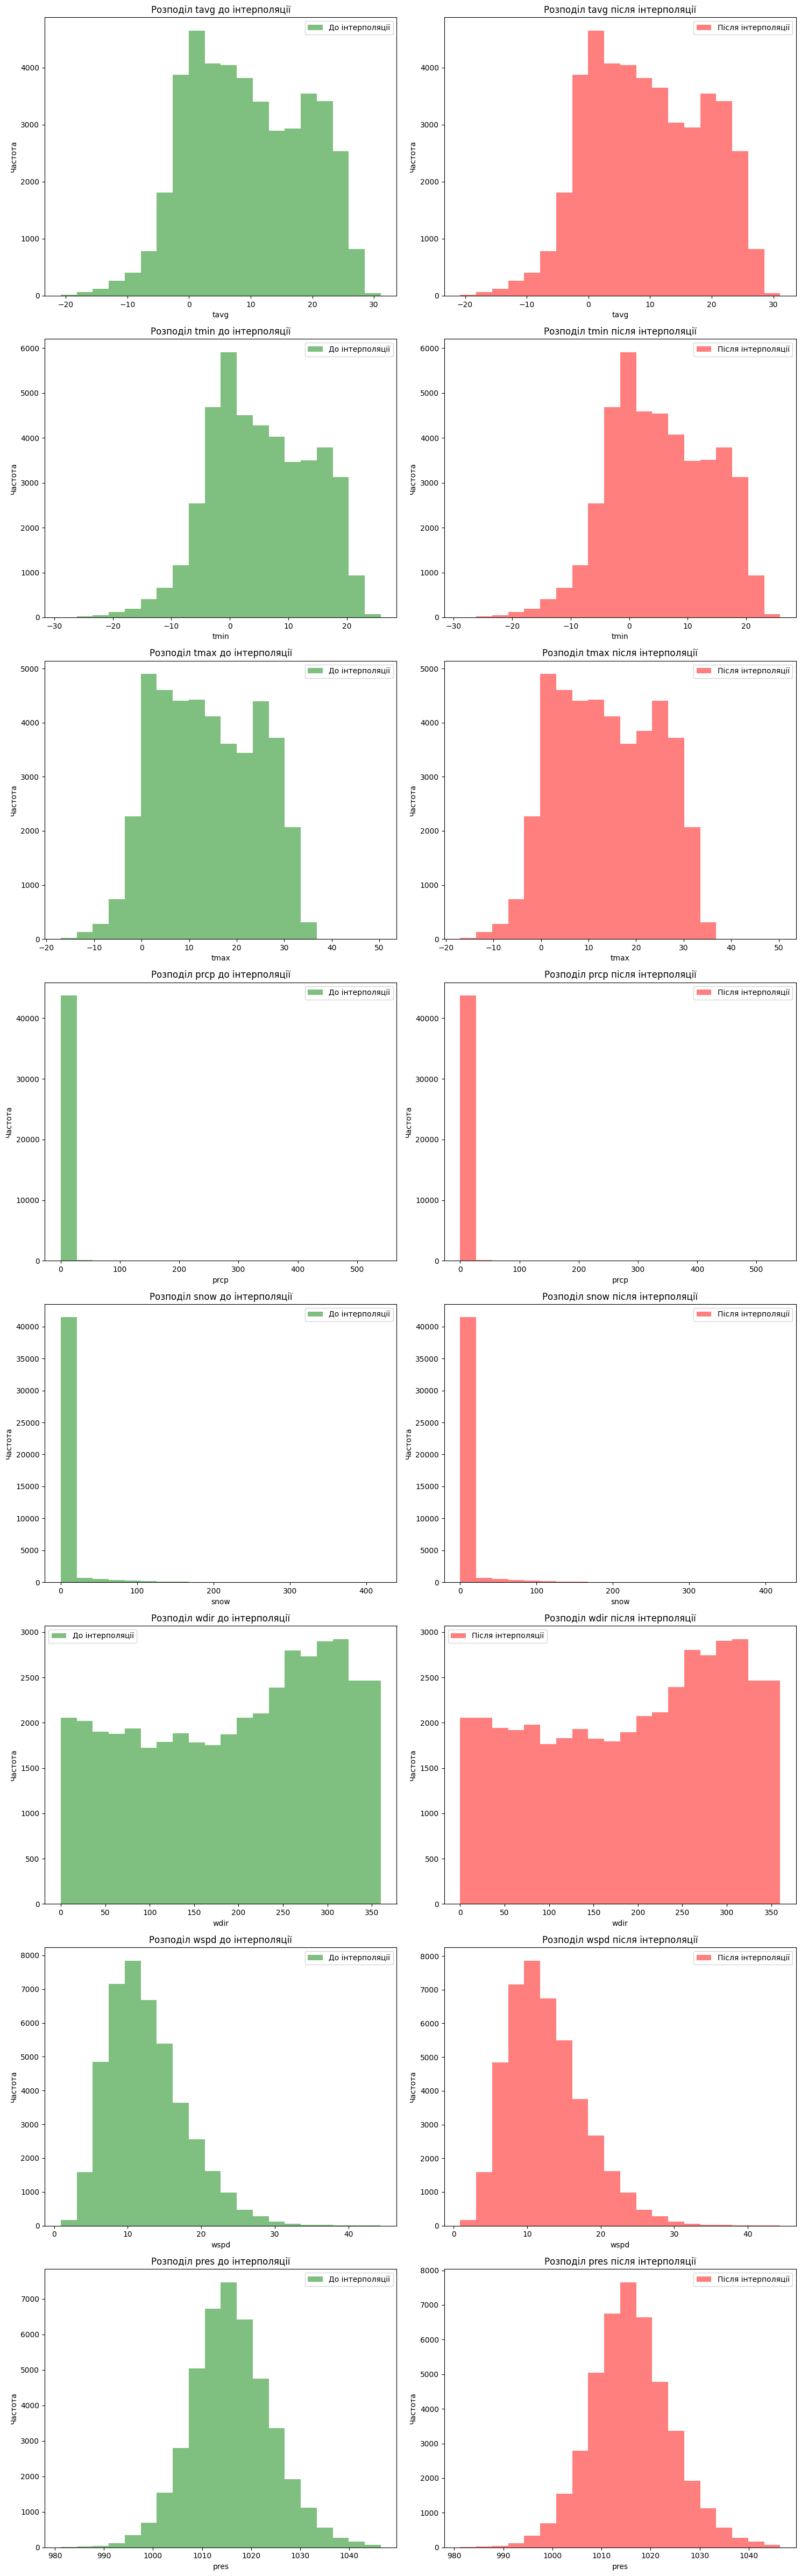

In [114]:
import matplotlib.pyplot as plt

# Вибір стовпців з числовими значеннями для порівняння
numeric_columns = data_meteo_new.select_dtypes(include=['float64', 'int64']).columns

# Створення фігури та підграфіків для графіків
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, 6*len(numeric_columns)))

# Побудова графіків розподілу для кожного числового стовпця
for i, column in enumerate(numeric_columns):
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    
    ax1.hist(data_meteo_new[column], bins=20, color='green', alpha=0.5, label='До інтерполяції')
    ax1.set_title(f'Розподіл {column} до інтерполяції')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Частота')
    ax1.legend()

    ax2.hist(data_meteo_new_interpolated[column], bins=20, color='red', alpha=0.5, label='Після інтерполяції')
    ax2.set_title(f'Розподіл {column} після інтерполяції')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Частота')
    ax2.legend()

plt.tight_layout()
plt.show()


In [115]:
# Створення нового стовпця з номером місяця
data_meteo_new_interpolated['Місяць'] = data_meteo_new_interpolated['date'].dt.month
# Створення нового стовпця з номером року
data_meteo_new_interpolated['Рік'] = data_meteo_new_interpolated['date'].dt.year
data_meteo_new_interpolated

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Місто,Місяць,Рік
0,2021-01-01,5.9,3.9,9.0,4.6,0.0,190.0,13.5,1008.3,Бровари,1,2021
1,2021-01-02,2.4,-0.6,6.0,0.0,0.0,226.0,11.9,1021.5,Бровари,1,2021
2,2021-01-03,1.1,-1.4,2.0,0.0,0.0,141.0,10.8,1025.5,Бровари,1,2021
3,2021-01-04,2.1,0.5,3.0,1.3,0.0,133.0,10.4,1022.1,Бровари,1,2021
4,2021-01-05,-0.7,-1.2,0.0,0.0,0.0,108.0,14.9,1019.1,Бровари,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
43871,2024-03-27,7.2,1.9,11.9,0.0,0.0,294.0,8.4,1015.9,Горішні Плавні,3,2024
43872,2024-03-28,8.7,3.3,14.3,1.9,0.0,150.0,17.1,1014.1,Горішні Плавні,3,2024
43873,2024-03-29,10.5,6.5,15.3,2.8,0.0,209.0,14.1,1008.8,Горішні Плавні,3,2024
43874,2024-03-30,11.4,5.3,17.4,0.0,0.0,236.0,11.7,1018.2,Горішні Плавні,3,2024


In [120]:
# Агрегування щоденних даних до місячного рівня
import numpy as np
def mean_wind_direction(directions):
    sin_mean = np.mean(np.sin(np.deg2rad(directions)))
    cos_mean = np.mean(np.cos(np.deg2rad(directions)))
    return np.rad2deg(np.arctan2(sin_mean, cos_mean)) % 360
data_meteo_new_month = data_meteo_new_interpolated.groupby(['Місто','Рік', 'Місяць']).agg({
    'tavg': 'mean',
    'tmin': 'mean',
    'tmax': 'mean',
    'prcp': 'sum',  # Сумарні опади за місяць
    'wdir':  mean_wind_direction,  # Векторне середнє для напрямку вітру
    'wspd': 'mean',
    'pres': 'mean', 
}).reset_index()
data_meteo_new_month

,Місто,Рік,Місяць,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,Івано-Франківськ,2021,1,-1.277419,-4.948387,2.377419,26.1,215.863454,10.854839,1010.967742
1,Івано-Франківськ,2021,2,-1.621429,-6.821429,3.171429,62.0,275.625204,12.892857,1019.925000
2,Івано-Франківськ,2021,3,2.174194,-2.303226,7.232258,91.0,289.994916,11.335484,1018.935484
3,Івано-Франківськ,2021,4,6.516667,1.316667,12.043333,43.3,284.405248,11.080000,1015.700000
4,Івано-Франківськ,2021,5,13.774194,8.329032,19.300000,82.1,241.469630,11.938710,1012.580645
...,...,...,...,...,...,...,...,...,...,...
1438,Чернігів,2023,11,2.820000,0.223333,5.453333,129.8,251.053483,17.293333,1007.006667
1439,Чернігів,2023,12,-0.645161,-2.783871,0.932258,59.8,228.135029,18.796774,1011.770968
1440,Чернігів,2024,1,-4.958065,-8.609677,-2.580645,52.3,250.801175,18.022581,1015.838710
1441,Чернігів,2024,2,2.417241,-0.113793,5.041379,53.5,185.070633,17.586207,1014.031034


In [121]:
# Запис у excel-файл на різні листи
with pd.ExcelWriter('D:/Jupyter notebook/4 курс/Air_town/Data_meteo_town.xlsx') as writer:
    data_meteo_new_interpolated.to_excel(writer, sheet_name='Дані по днях', index=False)
    data_meteo_new_month.to_excel(writer, sheet_name='Дані по місяцях', index=False)